In [1]:
import pandas as pd
import zipfile 
import glob, os
import numpy as np
import pylab as pl
import json
import urllib.request
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ll84_2011 = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84__2011_.csv')
ll84_2012 = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84__2012_.csv')
ll84_2013 = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')
ll84_2014 = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law__2014_.csv')

In [3]:
print(ll84_2011.columns)
print(ll84_2012.columns)
print(ll84_2013.columns)
print(ll84_2014.columns)

Index(['BBL', 'Street Number', 'Street Name', 'Borough', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI',
       'Weather Normalized Source EUI', 'Water per Square Foot',
       'ENERGY STAR Score', 'GHG', 'Reported Building Square Footage',
       'Reported Facility Type', 'Number of Buildings', 'Reported BINs'],
      dtype='object')
Index(['BBL', 'Street Number', 'Street Name', 'Borough', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Indoor Water Intensity (All Water Sources)(gal/ft2)',
       'Reported Water Method', 'ENERGY STAR Score',
       'Total GHG Emissions(MtCO2e)',
       'Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'Number of Buildings',
       'Reported BINs'],
      dtype='object')
Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Repor

In [4]:
print("******2011******")
print(len(ll84_2011))
print(len(ll84_2011[ ~isnan(ll84_2011['Site EUI']) ] ))


print("******2012******")
print(len(ll84_2012))
print(len(ll84_2012[ ~isnan(ll84_2012['Site EUI(kBtu/ft2)']) ] ))

print("******2013******")
print(len(ll84_2013))
print(len(ll84_2013[ ll84_2013['Site EUI(kBtu/ft2)'] != nan ] ))

print("******2014******")
print(len(ll84_2014))
print(len(ll84_2014[ ll84_2014['Site EUI(kBtu/ft2)'] != nan ] ))




******2011******
4081
2319
******2012******
14112
11074
******2013******
16170
16170
******2014******
13974
13974


In [5]:
# ll84_2011[ ~isnan(ll84_2011['Site EUI']) ]['Site EUI']

In [6]:
mask = ( ll84_2011['Reported BINs'] != nan ) & ( ~isnan(ll84_2011['Site EUI']) & (ll84_2011['Reported Facility Type'] == 'Multifamily Housing'))
buildings2011 = ll84_2011[ mask ]

In [7]:
buildings2011[['Site EUI']].sum()

Site EUI    71030.9
dtype: float64

In [8]:
buildings2011.head()

,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI,Weather Normalized Source EUI,Water per Square Foot,ENERGY STAR Score,GHG,Reported Building Square Footage,Reported Facility Type,Number of Buildings,Reported BINs
16,1000160220,450,NORTH END AVENUE,MANHATTAN,10282,Yes,589,88.2,177.8,NaN,NaN,1167.31,188216,Multifamily Housing,1,1085459
154,1001720020,76,LAFAYETTE STREET,MANHATTAN,10013,Yes,1729,81.1,114.1,NaN,NaN,1942.97,317464,Multifamily Housing,1,1001870
155,1001750033,365,BROADWAY,MANHATTAN,10013,Yes,1907,0.0,0.0,NaN,NaN,NaN,0,Multifamily Housing,1,1001939
166,1001950007,396,BROADWAY,MANHATTAN,10013,Yes,1409,0.5,1.6,NaN,NaN,2.74,61219,Multifamily Housing,1,1002323
171,1001980001,100,BAXTER STREET,MANHATTAN,10013,Yes,2483,30.2,51.4,15.67,NaN,491.21,253009,Multifamily Housing,1,1002364;1084763;1084583


In [9]:
len(buildings2011)

153

In [10]:
pl.histogram(buildings2011['Site EUI'])

(array([152,   0,   0,   0,   0,   0,   0,   0,   0,   1]),
 array([     0.  ,   5848.73,  11697.46,  17546.19,  23394.92,  29243.65,
         35092.38,  40941.11,  46789.84,  52638.57,  58487.3 ]))

In [11]:
ll84_2012.head()

,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Indoor Water Intensity (All Water Sources)(gal/ft2),Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,Number of Buildings,Reported BINs
0,1000010010,1,GOVERNORS ISLAND,MANHATTAN,10004,No Record as of 08/1/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,1000020002,NaN,MARGINAL STREET,MANHATTAN,10004,No Record as of 08/1/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,1000047501,1,WATER STREET,MANHATTAN,10004,Yes,41,102.0,287.9,16.37,Manual,75,25932.68,2428325,Office,1,1000005
3,1000057501,125,BROAD STREET,MANHATTAN,10004,Yes,3871,119.6,261.5,NaN,Manual,70,11637.42,1338000,Office,1,1000006
4,1003620001,134,AVENUE D,MANHATTAN,10009,Yes,8312,30.3,85.7,1.57,ABS,NaN,13709.99,5207812,Multifamily Housing,7,1077504;1077538;1077539;1077540;1077541;107754...


In [12]:
mask = ( ll84_2012['Reported BINs'] != nan ) & ( ~isnan(ll84_2012['Site EUI(kBtu/ft2)']) & (ll84_2012['Primary Property Type - Self Selected'] == 'Multifamily Housing'))
buildings2012 = ll84_2012[ mask ]

In [13]:
len(buildings2012)

8379

In [14]:
buildings2012

,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Indoor Water Intensity (All Water Sources)(gal/ft2),Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,Number of Buildings,Reported BINs
4,1003620001,134,AVENUE D,MANHATTAN,10009,Yes,8312,30.3,85.7,1.57,ABS,NaN,13709.99,5207812,Multifamily Housing,7,1077504;1077538;1077539;1077540;1077541;107754...
16,1011200022,15,WEST 67 STREET,MANHATTAN,10023,Yes,12382,62.4,91.8,8.92,ABS,NaN,330.36,64899,Multifamily Housing,1,1028241
19,1000157502,20,WEST STREET,MANHATTAN,10004,Yes,2843,50.1,141.4,NaN,Manual,NaN,907.90,227463,Multifamily Housing,1,1087243;1000046
20,3068180025,1840,EAST 13 STREET,BROOKLYN,11229,Yes,7792,49.7,82.4,10.56,ABS,NaN,430.36,138476,Multifamily Housing,1,3183899
21,1011860091,316,WEST 79 STREET,MANHATTAN,10024,Yes,1747,60.9,92.3,10.72,ABS,NaN,315.64,63121,Multifamily Housing,1,1031130
22,1000160100,345,SOUTH END AVENUE,MANHATTAN,10280,Yes,10515,67.5,194.5,NaN,Manual,NaN,7481.30,1368917,Multifamily Housing,6,1083378; 1083373; 1083374; 1083375; 1083376; 1...
25,1000160180,20,RIVER TERRACE,MANHATTAN,10007,Yes,203,112.4,197.7,30.54,Manual,NaN,2633.83,356786,Multifamily Housing,1,1086174
26,1000160185,211,NORTH END AVENUE,MANHATTAN,10282,Yes,202,96.3,160.3,36.28,Manual,NaN,1853.76,300000,Multifamily Housing,1,1086547
27,1000160190,22,RIVER TERRACE,MANHATTAN,10282,Yes,517,70.3,134.6,NaN,Manual,NaN,1613.33,331500,Multifamily Housing,1,BIN# 1085929
28,1000160195,325,NORTH END AVENUE,MANHATTAN,10282,Yes,10059,100.5,192.0,43.57,Manual,NaN,2183.42,322505,Multifamily Housing,1,1086507


In [15]:
len(ll84_2012)

14112

In [16]:
income = pd.read_csv('income.csv')
income.ctlabel = income.ctlabel.astype(float).astype(int)
incomed = income[['ctlabel', 'median_household_income']].set_index('ctlabel').to_dict()
incomed = incomed['median_household_income']

In [17]:
mnPluto = pd.read_csv('nyc_pluto_15v1/Mn.csv')
bkPluto = pd.read_csv('nyc_pluto_15v1/BK.csv')
bxPluto = pd.read_csv('nyc_pluto_15v1/BK.csv')
siPluto = pd.read_csv('nyc_pluto_15v1/SI.csv')
qnPluto = pd.read_csv('nyc_pluto_15v1/QN.csv')
print(mnPluto.columns)
mnPluto.head()

/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6,7,8,10,27,50,52,53,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (4,6,7,8,10,11,50,52,53,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'LtdHeight', 'AllZoning1',
       'AllZoning2', 'SplitZone', 'BldgClass', 'LandUse', 'Easements',
       'OwnerType', 'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea',
       'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea',
       'OtherArea', 'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes',
       'UnitsTotal', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext',
       'ProxCode', 'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand',
       'AssessTot', 'ExemptLand', 'ExemptTot', 'YearBuilt', 'BuiltCode',
       'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark', 'BuiltFAR',
       'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL', 'CondoNo',
       'Tract2010', 'XCoord', 'YCoord', 'ZoneMa

/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6,7,10,11,50,52,53,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,MN,1,10,101,5,1018,2,1,10004,E007,...,190225,16a,Y,199 999,10101,,0,,1,15v1
1,MN,1,101,101,1,1001,2,1,10004,E007,...,190636,16a,Y,199 999,10101,,0,,1,15v1
2,MN,1,201,101,1,1000,2,1,10004,E007,...,193648,12b,,199 999,10101,,0,,1,15v1
3,MN,1,301,101,,,2,1,10004,E007,...,,12b,,199 999,10101,,0,,4,15v1
4,MN,1,401,101,,,2,1,10004,E007,...,,12b,,1 99 999,10101,,0,,4,15v1


In [18]:
nycPluto = pd.concat([mnPluto, bkPluto, bxPluto, qnPluto, siPluto])

In [19]:
# nycPluto

In [20]:
len(mnPluto)

43231

In [21]:
nycBuildings2012 = pd.merge(buildings2012,nycPluto,on='BBL')
len(nycBuildings2012)

8339

In [22]:
mnBuildings2012 = pd.merge(buildings2012,mnPluto,on='BBL')
len(mnBuildings2012)

3307

In [23]:
bkBuildings2012 = pd.merge(buildings2012,bkPluto,on='BBL')
len(bkBuildings2012)

1651

In [24]:
bxBuildings2012 = pd.merge(buildings2012,bxPluto,on='BBL')
len(bxBuildings2012)

1651

In [25]:
qnBuildings2012 = pd.merge(buildings2012,qnPluto,on='BBL')
len(qnBuildings2012)

1632

In [26]:
siBuildings2012 = pd.merge(buildings2012,siPluto,on='BBL')
len(siBuildings2012)

98

In [27]:
# print(mnBuildings2012.columns)
# mnBuildings2012.loc[0]

In [28]:
mnBuildings2012['Site EUI(kBtu/ft2)'].describe()

count     3307.000000
mean       592.650076
std       5235.394166
min          0.000000
25%         61.400000
50%         75.100000
75%         92.650000
max      92295.500000
Name: Site EUI(kBtu/ft2), dtype: float64

In [29]:
mnBuildings2012['totalEUI'] = mnBuildings2012['Site EUI(kBtu/ft2)'] * mnBuildings2012['Property Floor Area (Buildngs and Parking)(ft2)']

In [30]:
totalEUI = mnBuildings2012[mnBuildings2012.totalEUI<2*10e6].totalEUI.tolist()

In [31]:
totalEUI = sorted(totalEUI)

(array([  19.,    4.,   18.,   23.,   23.,   20.,   29.,   49.,   69.,
         103.,  122.,  137.,  151.,  140.,  132.,  122.,  134.,  125.,
         116.,   77.,   91.,   82.,   65.,   68.,   63.,   54.,   52.,
          65.,   49.,   38.,   52.,   29.,   34.,   33.,   27.,   31.,
          21.,   20.,   29.,   30.,   32.,   18.,   13.,   20.,   14.,
          16.,   23.,   20.,   19.,   14.]),
 array([        0.   ,    399974.784,    799949.568,   1199924.352,
          1599899.136,   1999873.92 ,   2399848.704,   2799823.488,
          3199798.272,   3599773.056,   3999747.84 ,   4399722.624,
          4799697.408,   5199672.192,   5599646.976,   5999621.76 ,
          6399596.544,   6799571.328,   7199546.112,   7599520.896,
          7999495.68 ,   8399470.464,   8799445.248,   9199420.032,
          9599394.816,   9999369.6  ,  10399344.384,  10799319.168,
         11199293.952,  11599268.736,  11999243.52 ,  12399218.304,
         12799193.088,  13199167.872,  13599142.656,  13

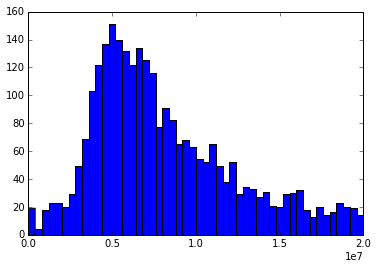

In [32]:
# plt.ylim(0,1e7)
plt.hist(totalEUI, 50)

In [33]:
siteEUI = mnBuildings2012[mnBuildings2012['Site EUI(kBtu/ft2)']<300]['Site EUI(kBtu/ft2)'].tolist()
print(len(siteEUI))
# plt.hist(siteEUI,50);

3263


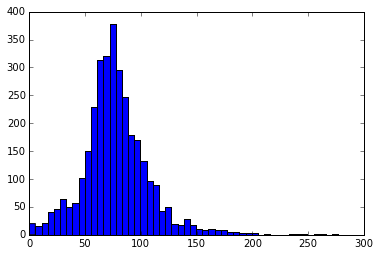

In [34]:
plt.hist(siteEUI,50);

In [35]:
print(mnBuildings2012.columns)
mnBuildings2012En = mnBuildings2012[mnBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'CB2010', 'CT2010'
                                    ,'Indoor Water Intensity (All Water Sources)(gal/ft2)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea']]

mnBuildings2012En = mnBuildings2012En.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 ,'Indoor Water Intensity (All Water Sources)(gal/ft2)':'water'})

mnBuildings2012En['totalEUI'] = mnBuildings2012En.siteEUI * mnBuildings2012En.floorArea
mnBuildings2012En['age20'] = mnBuildings2012En['YearBuilt'] > 1995
mnBuildings2012En['age40'] = (mnBuildings2012En['YearBuilt'] > 1975) & ( mnBuildings2012En['YearBuilt'] < 1995)
mnBuildings2012En['age60'] = (mnBuildings2012En['YearBuilt'] > 1955) & (mnBuildings2012En['YearBuilt'] < 1975)
mnBuildings2012En['age60ab'] = mnBuildings2012En['YearBuilt'] < 1955
mnBuildings2012En['nonRes'] = mnBuildings2012En.floorArea.astype(float) -  mnBuildings2012En.ResArea.astype(float)
mnBuildings2012En["CT2010"] = mnBuildings2012En["CT2010"].astype(float).astype(int)
mnBuildings2012En['income'] = mnBuildings2012En["CT2010"].map(incomed.get)
mnBuildings2012En = mnBuildings2012En[mnBuildings2012En.income>0]

Index(['BBL', 'Street Number', 'Street Name', 'Borough_x', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Indoor Water Intensity (All Water Sources)(gal/ft2)',
       'Reported Water Method', 'ENERGY STAR Score',
       'Total GHG Emissions(MtCO2e)',
       'Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'Number of Buildings',
       'Reported BINs', 'Borough_y', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010',
       'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthArea', 'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3',
       'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'LtdHeight',
       'AllZoning1', 'AllZoning2', 'SplitZone', 'BldgClass', 'LandUse',
       'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea', 'ComArea',
       'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea',
       

In [36]:
model1 = smf.ols( formula= 'siteEUI ~ I(income/10000) + LtdHeight + NumFloors + floorArea ', data= mnBuildings2012En).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     13.44
Date:                Fri, 11 Dec 2015   Prob (F-statistic):           7.31e-11
Time:                        10:26:25   Log-Likelihood:                -15183.
No. Observations:                3154   AIC:                         3.038e+04
Df Residuals:                    3149   BIC:                         3.041e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             78.8146      1.341     58.761      0.000        76.185    81.444
LtdHeight[T.LH-1A]    -9.7903      3.586     -2.730      0.006       -16.822    -2.758
I(income / 10000)     -0.7161      0.213     -3.356      0.001        -1.134    -0.298
NumFloors              0.2986      0.061      4.885      0.000         0.179     0.419
floorArea          -1.168e-05   2.18e-06     -5.363      0.000     -1.59e-05 -7.41e-06
==============================================================================
Omnibus:                      614.831   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2301.662
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       6.749   Cond. No.                     2.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
model1 = smf.ols( formula= 'GHG ~ I(AssessTot/10000) + siteEUI  + LtdHeight+ ProxCode+ UnitsTotal  + NumFloors  + age20 + age40 + age60 +I(income/10000)', data= mnBuildings2012En).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     319.0
Date:                Fri, 11 Dec 2015   Prob (F-statistic):               0.00
Time:                        10:26:25   Log-Likelihood:                -25523.
No. Observations:                3139   AIC:                         5.107e+04
Df Residuals:                    3126   BIC:                         5.115e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             -512.1860     62.310     -8.220      0.000      -634.359  -390.013
LtdHeight[T.LH-1A]     -38.9137    100.125     -0.389      0.698      -235.230   157.403
ProxCode[T.1]          347.8592     45.210      7.694      0.000       259.215   436.504
ProxCode[T.2]          -21.5558     42.189     -0.511      0.609      -104.277    61.165
ProxCode[T.3]          -81.1837     40.801     -1.990      0.047      -161.183    -1.185
age20[T.True]         -321.8918     52.724     -6.105      0.000      -425.269  -218.514
age40[T.True]         -255.6557     56.285     -4.542      0.000      -366.015  -145.297
age60[T.True]           34.2630     41.888      0.818      0.413       -47.867   116.393
I(AssessTot / 10000)     0.3066      0.014     21.756      0.000         0.279     0.334
siteEUI                  9.3200      0.493     18.906      0.000         8.353    10.287
UnitsTotal               1.4241      0.099     14.451      0.000         1.231     1.617
NumFloors               15.8938      2.289      6.943      0.000        11.405    20.382
I(income / 10000)      -14.2880      5.960     -2.397      0.017       -25.974    -2.602
==============================================================================
Omnibus:                     3025.211   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234042.237
Skew:                           4.442   Prob(JB):                         0.00
Kurtosis:                      44.358   Cond. No.                     1.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# print(nycBuildings2012.columns)
nycBuildings2012 = nycBuildings2012[nycBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'CB2010', 'CT2010'
                                    ,'Indoor Water Intensity (All Water Sources)(gal/ft2)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea']]

nycBuildings2012 = nycBuildings2012.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 ,'Indoor Water Intensity (All Water Sources)(gal/ft2)':'water'})

nycBuildings2012['totalEUI'] = nycBuildings2012.siteEUI * nycBuildings2012.floorArea
nycBuildings2012['age20'] = nycBuildings2012['YearBuilt'] > 1995
nycBuildings2012['age40'] = (nycBuildings2012['YearBuilt'] > 1975) & ( nycBuildings2012['YearBuilt'] < 1995)
nycBuildings2012['age60'] = (nycBuildings2012['YearBuilt'] > 1955) & (nycBuildings2012['YearBuilt'] < 1975)
nycBuildings2012['age60ab'] = nycBuildings2012['YearBuilt'] < 1955
nycBuildings2012['nonRes'] = nycBuildings2012.floorArea.astype(float) -  nycBuildings2012.ResArea.astype(float)
nycBuildings2012["CT2010"] = nycBuildings2012["CT2010"].astype(float).astype(int)
nycBuildings2012["ProxCode"] = nycBuildings2012["ProxCode"].astype(float).astype(int)
nycBuildings2012['income'] = nycBuildings2012["CT2010"].map(incomed.get)
nycBuildings2012 = nycBuildings2012[nycBuildings2012.income>0]

In [39]:
print(nycBuildings2012.columns)
nycBuildings2012.head()

Index(['siteEUI', 'floorArea', 'ZipCode', 'numBldgs', 'UnitsRes', 'UnitsTotal',
       'YearBuilt', 'LotArea', 'NumFloors', 'ResArea', 'RetailArea',
       'AssessTot', 'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR', 'LotArea',
       'LotFront', 'LotDepth', 'BldgFront', 'GHG', 'CB2010', 'CT2010', 'water',
       'ProxCode', 'LtdHeight', 'HistDist', 'BldgArea', 'ComArea',
       'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea',
       'OtherArea', 'totalEUI', 'age20', 'age40', 'age60', 'age60ab', 'nonRes',
       'income'],
      dtype='object')


,siteEUI,floorArea,ZipCode,numBldgs,UnitsRes,UnitsTotal,YearBuilt,LotArea,NumFloors,ResArea,...,StrgeArea,FactryArea,OtherArea,totalEUI,age20,age40,age60,age60ab,nonRes,income
1,62.4,64899,10023,1,31,31,1905,7532,14,64899,...,0,0,0,4049697.6,False,False,False,True,0,40665
2,50.1,227463,10004,1,283,284,1930,13928,45,168748,...,0,0,0,11395896.3,False,False,False,True,58715,58828
3,49.7,138476,11229,1,125,125,1954,32000,6,132000,...,0,0,0,6882257.2,False,False,False,True,6476,37828
4,49.7,138476,11229,1,125,125,1954,32000,6,132000,...,0,0,0,6882257.2,False,False,False,True,6476,37828
5,60.9,63121,10024,1,25,25,1910,6641,12,58266,...,0,0,0,3844068.9,False,False,False,True,4855,14432


In [40]:
model1 = smf.ols( formula= 'GHG ~ siteEUI + age20 + C(ProxCode)+ age40 +I(income/10000)+ LtdHeight +age60 + I(AssessTot/10000) + NumFloors', data= nycBuildings2012).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     90.53
Date:                Fri, 11 Dec 2015   Prob (F-statistic):          1.50e-210
Time:                        10:26:25   Log-Likelihood:                -78793.
No. Observations:                7989   AIC:                         1.576e+05
Df Residuals:                    7976   BIC:                         1.577e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -1830.5780    180.175    -10.160      0.000     -2183.769 -1477.387
age20[T.True]         -285.4182    195.015     -1.464      0.143      -667.699    96.863
C(ProxCode)[T.1]      1378.4268    163.438      8.434      0.000      1058.045  1698.809
C(ProxCode)[T.2]      -151.3715    175.647     -0.862      0.389      -495.686   192.943
C(ProxCode)[T.3]      -170.5821    173.706     -0.982      0.326      -511.092   169.927
age40[T.True]         -311.3047    236.745     -1.315      0.189      -775.387   152.778
LtdHeight[T.LH-1 ]     650.3591    831.213      0.782      0.434      -979.035  2279.754
LtdHeight[T.LH-1A]      51.5697    560.864      0.092      0.927     -1047.870  1151.010
age60[T.True]         1119.7616    132.258      8.467      0.000       860.502  1379.021
siteEUI                 39.1015      1.627     24.030      0.000        35.912    42.291
I(income / 10000)     -164.3109     24.431     -6.726      0.000      -212.201  -116.421
I(AssessTot / 10000)     0.6511      0.059     11.102      0.000         0.536     0.766
NumFloors              -23.7930     10.157     -2.342      0.019       -43.704    -3.882
==============================================================================
Omnibus:                    14873.689   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17171550.467
Skew:                          14.272   Prob(JB):                         0.00
Kurtosis:                     228.324   Cond. No.                     2.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# print(nycBuildings2012.columns)
bkBuildings2012 = bkBuildings2012[bkBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'CB2010', 'CT2010'
                                    ,'Indoor Water Intensity (All Water Sources)(gal/ft2)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea']]

bkBuildings2012 = bkBuildings2012.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 ,'Indoor Water Intensity (All Water Sources)(gal/ft2)':'water'})

bkBuildings2012['totalEUI'] = bkBuildings2012.siteEUI * bkBuildings2012.floorArea
bkBuildings2012['age20'] = bkBuildings2012['YearBuilt'] > 1995
bkBuildings2012['age40'] = (bkBuildings2012['YearBuilt'] > 1975) & ( bkBuildings2012['YearBuilt'] < 1995)
bkBuildings2012['age60'] = (bkBuildings2012['YearBuilt'] > 1955) & (bkBuildings2012['YearBuilt'] < 1975)
bkBuildings2012['age60ab'] = bkBuildings2012['YearBuilt'] < 1955
bkBuildings2012['nonRes'] = bkBuildings2012.floorArea.astype(float) -  bkBuildings2012.ResArea.astype(float)
bkBuildings2012["CT2010"] = bkBuildings2012["CT2010"].astype(float).astype(int)
bkBuildings2012['income'] = bkBuildings2012["CT2010"].map(incomed.get)
bkBuildings2012 = bkBuildings2012[bkBuildings2012.income>0]

In [42]:
bkBuildings2012['ProxCode'] = bkBuildings2012['ProxCode'].astype(int)

In [43]:
model1 = smf.ols( formula= 'siteEUI ~ I(income/10000) + LtdHeight + NumFloors + floorArea ', data= bkBuildings2012).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     44.86
Date:                Fri, 11 Dec 2015   Prob (F-statistic):           9.93e-36
Time:                        10:26:25   Log-Likelihood:                -7678.2
No. Observations:                1589   AIC:                         1.537e+04
Df Residuals:                    1584   BIC:                         1.539e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             65.9555      2.103     31.359      0.000        61.830    70.081
LtdHeight[T.LH-1 ]    -0.8855      7.836     -0.113      0.910       -16.255    14.484
I(income / 10000)      0.4224      0.403      1.049      0.295        -0.368     1.213
NumFloors              0.3537      0.176      2.005      0.045         0.008     0.700
floorArea           1.322e-05   1.03e-06     12.853      0.000      1.12e-05  1.52e-05
==============================================================================
Omnibus:                      157.038   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              815.398
Skew:                           0.303   Prob(JB):                    8.68e-178
Kurtosis:                       6.457   Cond. No.                     8.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model1 = smf.ols( formula= 'GHG ~ I(AssessTot/10000) + siteEUI  + LtdHeight+ UnitsTotal  + ProxCode+ NumFloors  + age20 + age40 + age60 +I(income/10000)', data= bkBuildings2012).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     69.07
Date:                Fri, 11 Dec 2015   Prob (F-statistic):          2.44e-107
Time:                        11:11:20   Log-Likelihood:                -16177.
No. Observations:                1585   AIC:                         3.237e+04
Df Residuals:                    1575   BIC:                         3.243e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -3989.9374    599.851     -6.652      0.000     -5166.527 -2813.348
age20[T.True]          115.8572    622.144      0.186      0.852     -1104.461  1336.175
age40[T.True]        -1303.5677    929.473     -1.402      0.161     -3126.702   519.567
age60[T.True]         1711.3503    421.801      4.057      0.000       884.000  2538.701
I(AssessTot / 10000)     4.3179      0.694      6.223      0.000         2.957     5.679
siteEUI                 85.7734      5.304     16.171      0.000        75.370    96.177
UnitsTotal               8.1088      1.591      5.097      0.000         4.988    11.229
ProxCode               735.5303    279.693      2.630      0.009       186.921  1284.140
NumFloors             -364.8293     51.266     -7.116      0.000      -465.386  -264.272
I(income / 10000)     -315.0841     85.758     -3.674      0.000      -483.297  -146.872
==============================================================================
Omnibus:                     2096.130   Durbin-Watson:                   0.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336973.139
Skew:                           7.321   Prob(JB):                         0.00
Kurtosis:                      72.914   Cond. No.                     3.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# print(nycBuildings2012.columns)
bxBuildings2012 = bxBuildings2012[bxBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'CB2010', 'CT2010'
                                    ,'Indoor Water Intensity (All Water Sources)(gal/ft2)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea']]

bxBuildings2012 = bxBuildings2012.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 ,'Indoor Water Intensity (All Water Sources)(gal/ft2)':'water'})

bxBuildings2012['totalEUI'] = bxBuildings2012.siteEUI * bxBuildings2012.floorArea
bxBuildings2012['age20'] = bxBuildings2012['YearBuilt'] > 1995
bxBuildings2012['age40'] = (bxBuildings2012['YearBuilt'] > 1975) & ( bxBuildings2012['YearBuilt'] < 1995)
bxBuildings2012['age60'] = (bxBuildings2012['YearBuilt'] > 1955) & (bxBuildings2012['YearBuilt'] < 1975)
bxBuildings2012['age60ab'] = bxBuildings2012['YearBuilt'] < 1955
bxBuildings2012['nonRes'] = bxBuildings2012.floorArea.astype(float) -  bxBuildings2012.ResArea.astype(float)
bxBuildings2012["CT2010"] = bxBuildings2012["CT2010"].astype(float).astype(int)
bxBuildings2012["ProxCode"] = bxBuildings2012["ProxCode"].astype(float).astype(int)
bxBuildings2012['income'] = bxBuildings2012["CT2010"].map(incomed.get)
bxBuildings2012 = bxBuildings2012[bxBuildings2012.income>0]
model1 = smf.ols( formula= 'siteEUI ~ I(income/10000) + LtdHeight + NumFloors + floorArea ', data= bxBuildings2012).fit()
model1.summary()
model1 = smf.ols( formula= 'GHG ~ I(AssessTot/10000) + siteEUI  + LtdHeight+ UnitsTotal  + ProxCode+ NumFloors  + age20 + age40 + age60 +I(income/10000)', data= bxBuildings2012).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     62.12
Date:                Fri, 11 Dec 2015   Prob (F-statistic):          2.07e-106
Time:                        10:26:26   Log-Likelihood:                -16177.
No. Observations:                1585   AIC:                         3.238e+04
Df Residuals:                    1574   BIC:                         3.243e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -3982.5788    602.729     -6.608      0.000     -5164.815 -2800.343
LtdHeight[T.LH-1 ]     220.4970   1704.755      0.129      0.897     -3123.333  3564.327
age20[T.True]          110.1872    623.881      0.177      0.860     -1113.537  1333.912
age40[T.True]        -1300.5912    930.048     -1.398      0.162     -3124.855   523.672
age60[T.True]         1712.5713    422.038      4.058      0.000       884.755  2540.388
I(AssessTot / 10000)     4.3136      0.695      6.207      0.000         2.951     5.677
siteEUI                 85.7669      5.306     16.164      0.000        75.359    96.174
UnitsTotal               8.1124      1.592      5.097      0.000         4.991    11.234
ProxCode               734.2435    279.957      2.623      0.009       185.116  1283.371
NumFloors             -364.5530     51.326     -7.103      0.000      -465.228  -263.878
I(income / 10000)     -317.6212     87.999     -3.609      0.000      -490.229  -145.014
==============================================================================
Omnibus:                     2096.122   Durbin-Watson:                   0.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336938.380
Skew:                           7.321   Prob(JB):                         0.00
Kurtosis:                      72.911   Cond. No.                     6.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# print(nycBuildings2012.columns)
siBuildings2012 = siBuildings2012[siBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'CB2010', 'CT2010'
                                    ,'Indoor Water Intensity (All Water Sources)(gal/ft2)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea']]

siBuildings2012 = siBuildings2012.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 ,'Indoor Water Intensity (All Water Sources)(gal/ft2)':'water'})

siBuildings2012['totalEUI'] = siBuildings2012.siteEUI * siBuildings2012.floorArea
siBuildings2012['age20'] = siBuildings2012['YearBuilt'] > 1995
siBuildings2012['age40'] = (siBuildings2012['YearBuilt'] > 1975) & ( siBuildings2012['YearBuilt'] < 1995)
siBuildings2012['age60'] = (siBuildings2012['YearBuilt'] > 1955) & (siBuildings2012['YearBuilt'] < 1975)
siBuildings2012['age60ab'] = siBuildings2012['YearBuilt'] < 1955
siBuildings2012['nonRes'] = siBuildings2012.floorArea.astype(float) -  siBuildings2012.ResArea.astype(float)
siBuildings2012["CT2010"] = siBuildings2012["CT2010"].astype(float).astype(int)
siBuildings2012["ProxCode"] = siBuildings2012["ProxCode"].astype(float).astype(int)
siBuildings2012['income'] = siBuildings2012["CT2010"].map(incomed.get)
siBuildings2012 = siBuildings2012[siBuildings2012.income>0]
model1 = smf.ols( formula= 'GHG ~ I(AssessTot/10000) + siteEUI  + LtdHeight+ UnitsTotal  + ProxCode+ NumFloors  + age20 + age40 + age60 +I(income/10000)', data= siBuildings2012).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     11.60
Date:                Fri, 11 Dec 2015   Prob (F-statistic):           8.16e-12
Time:                        10:26:26   Log-Likelihood:                -739.02
No. Observations:                  98   AIC:                             1498.
Df Residuals:                      88   BIC:                             1524.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -1074.5732    281.364     -3.819      0.000     -1633.724  -515.422
age20[T.True]          439.2547    241.652      1.818      0.073       -40.978   919.488
age40[T.True]          273.0688    169.782      1.608      0.111       -64.337   610.475
age60[T.True]          471.0109    147.952      3.184      0.002       176.987   765.034
I(AssessTot / 10000)     0.0816      0.389      0.210      0.834        -0.692     0.855
siteEUI                  7.6709      2.068      3.709      0.000         3.561    11.781
UnitsTotal               1.5502      0.850      1.824      0.072        -0.139     3.239
ProxCode              -336.5016    132.412     -2.541      0.013      -599.642   -73.361
NumFloors               89.6122     20.153      4.447      0.000        49.562   129.663
I(income / 10000)       26.2303     19.052      1.377      0.172       -11.632    64.092
==============================================================================
Omnibus:                       77.564   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.658
Skew:                           2.624   Prob(JB):                    1.28e-106
Kurtosis:                      12.586   Cond. No.                     3.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
model1 = smf.ols( formula= 'siteEUI ~ I(income/10000) + LtdHeight + NumFloors + floorArea ', data= siBuildings2012).fit()
model1.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.388
Date:                Fri, 11 Dec 2015   Prob (F-statistic):             0.0739
Time:                        10:26:26   Log-Likelihood:                -460.29
No. Observations:                  98   AIC:                             928.6
Df Residuals:                      94   BIC:                             938.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            80.1874      7.113     11.274      0.000        66.065    94.309
I(income / 10000)    -2.3429      0.935     -2.505      0.014        -4.200    -0.486
NumFloors             0.8526      1.111      0.768      0.445        -1.353     3.058
floorArea          6.237e-06   3.25e-05      0.192      0.848     -5.82e-05  7.07e-05
==============================================================================
Omnibus:                        3.563   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                2.880
Skew:                           0.355   Prob(JB):                        0.237
Kurtosis:                       3.448   Cond. No.                     4.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# print(nycBuildings2012.columns)
qnBuildings2012 = qnBuildings2012[qnBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'CB2010', 'CT2010'
                                    ,'Indoor Water Intensity (All Water Sources)(gal/ft2)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea']]

qnBuildings2012 = qnBuildings2012.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 ,'Indoor Water Intensity (All Water Sources)(gal/ft2)':'water'})

qnBuildings2012['totalEUI'] = qnBuildings2012.siteEUI * qnBuildings2012.floorArea
qnBuildings2012['age20'] = qnBuildings2012['YearBuilt'] > 1995
qnBuildings2012['age40'] = (qnBuildings2012['YearBuilt'] > 1975) & ( qnBuildings2012['YearBuilt'] < 1995)
qnBuildings2012['age60'] = (qnBuildings2012['YearBuilt'] > 1955) & (qnBuildings2012['YearBuilt'] < 1975)
qnBuildings2012['age60ab'] = qnBuildings2012['YearBuilt'] < 1955
qnBuildings2012['nonRes'] = qnBuildings2012.floorArea.astype(float) -  qnBuildings2012.ResArea.astype(float)
qnBuildings2012["CT2010"] = qnBuildings2012["CT2010"].astype(float).astype(int)
qnBuildings2012["ProxCode"] = qnBuildings2012["ProxCode"].astype(float).astype(int)
qnBuildings2012['income'] = qnBuildings2012["CT2010"].map(incomed.get)
qnBuildings2012 = qnBuildings2012[qnBuildings2012.income>0]

In [49]:
model1 = smf.ols( formula= 'siteEUI ~ I(income/10000) + LtdHeight + NumFloors + floorArea ', data= qnBuildings2012).fit()
model1.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.929
Date:                Fri, 11 Dec 2015   Prob (F-statistic):           0.000124
Time:                        10:26:26   Log-Likelihood:                -7943.9
No. Observations:                1585   AIC:                         1.590e+04
Df Residuals:                    1581   BIC:                         1.592e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            79.3003      3.107     25.521      0.000        73.206    85.395
I(income / 10000)     1.0918      0.568      1.922      0.055        -0.022     2.206
NumFloors            -0.7171      0.279     -2.571      0.010        -1.264    -0.170
floorArea          -1.06e-05   8.05e-06     -1.317      0.188     -2.64e-05  5.19e-06
==============================================================================
Omnibus:                      423.440   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2197.462
Skew:                           1.153   Prob(JB):                         0.00
Kurtosis:                       8.287   Cond. No.                     6.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""